In [80]:
import os
import pandas as pd
import json
import matplotlib

In [7]:
%run ../utils/__init__.py
%run ../metrics/__init__.py

In [42]:
%run ../utils/plots.py

In [81]:
matplotlib.rcParams['figure.facecolor'] = 'white'

## Functions

In [40]:
LABELS = ['covid', 'non-c', 'normal']

In [8]:
classification = True

In [9]:
base_folder = os.path.join(WORKSPACE_DIR,
                           'classification' if classification else 'report_generation')
results_folder = os.path.join(base_folder, 'results')

In [13]:
def load_results(run_name, additional=None):
    all_results = []

    folder = os.path.join(results_folder, run_name)

    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)

        if not os.path.isfile(filepath):
            continue
            
        if additional and additional not in filename:
            continue

        with open(filepath, 'r') as f:
            results = json.load(f)

        additional_name = filename.replace('metrics', '').replace('.json', '')
        all_results.append((additional_name, results))

    return all_results

## Examples

### Example 1: Covid-UC, size 512, frontal only

In [68]:
results = load_results('0717_120222_covid-x_densenet-121_lr1e-06_os_aug-covid', 'covid-uc_size512_frontal')
list(zip(*results))[0]

('-covid-uc_size512_frontal',)

In [69]:
result = results[0][1]
result

{'all': {'loss': 4.755333423614502,
  'acc': 0.26991869918699185,
  'prec_covid': 0.04608294930875576,
  'prec_Non-COVID': 0.28205128205128205,
  'prec_normal': 0.9507042253521126,
  'recall_covid': 0.8333333333333334,
  'recall_Non-COVID': 0.14864864864864866,
  'recall_normal': 0.2611218568665377,
  'spec_covid': 0.29949238578680204,
  'spec_Non-COVID': 0.9482439926062847,
  'spec_normal': 0.9285714285714286,
  'cm': [[20, 4, 0], [55, 12, 7], [342, 35, 140]]}}

In [70]:
cm = result['all']['cm']

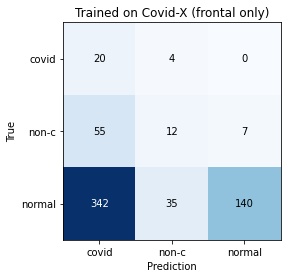

In [73]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plot_cm(cm, labels=LABELS, title='Trained on Covid-X (frontal only)', percentage=False)

### Example 2: Covid-X + Covid-UC

In [65]:
results = load_results('0722_201835_covid-uc_densenet-121_lr0.0001_os-max10_aug_pre-covid-x')
list(zip(*results))[0]

('',)

In [66]:
cm = results[0][1]['val']['cm']

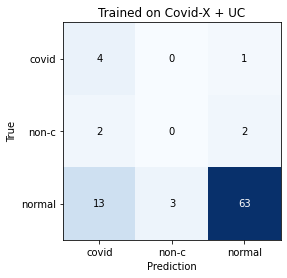

In [67]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plot_cm(cm, labels=LABELS, title='Trained on Covid-X + UC', percentage=False)

### Example 3

In [54]:
results = load_results('0722_193534_covid-uc_densenet-121_lr0.0001_os-max10_aug_size256')
list(zip(*results))[0]

('',)

In [61]:
cm = results[0][1]['val']['cm']

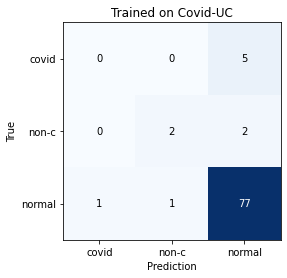

In [64]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plot_cm(cm, labels=LABELS, title='Trained on Covid-UC', percentage=False)

### Example 4: winner

In [74]:
results = load_results('0717_120222_covid-x_densenet-121_lr1e-06_os_aug-covid')
list(zip(*results))[0]

('',
 '-covid-uc_size256_frontal',
 '-covid-uc_size512_frontal',
 '-covid-uc_size512',
 '-covid-uc_size256')

In [79]:
cm = results[0][1]['test']['cm']

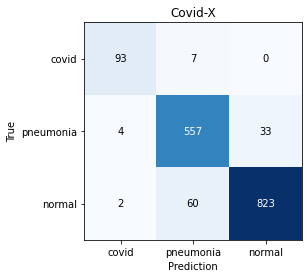

In [83]:
plot_cm(cm, labels=['covid', 'pneumonia', 'normal'], title='Covid-X', percentage=False)